In [1]:
import numpy as np
import pandas as pd
import os 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Input, Add
from tensorflow.keras.models import Model

The structure of this file will be 96x7049 matrix with total 96.
hight = 96 , width = 96, color = 7049 layer of images

In [4]:
np.load("C:/Users/Dell/Downloads/Face_landmarks/face_images.npz")['face_images'].shape

(96, 96, 7049)

Now we move axes of an array to new positions.

In [5]:
PicFace = np.moveaxis(np.load('C:/Users/Dell/Downloads/Face_landmarks/face_images.npz')['face_images'],-1,0)
print(PicFace.shape)

(7049, 96, 96)


In [6]:
KP = pd.read_csv('C:/Users/Dell/Downloads/Face_landmarks/facial_keypoints.csv')
print("Number of null")
print(KP.isnull().sum())

Number of null
left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33

In [7]:
KP.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


All images have 4 key points

In [8]:
Frac_KP = (KP.iloc[:,0::2].isnull().mean(0))*100
print(100-Frac_KP)

left_eye_center_x             99.858136
right_eye_center_x            99.815577
left_eye_inner_corner_x       32.217336
left_eye_outer_corner_x       32.160590
right_eye_inner_corner_x      32.174777
right_eye_outer_corner_x      32.174777
left_eyebrow_inner_end_x      32.203149
left_eyebrow_outer_end_x      31.564761
right_eyebrow_inner_end_x     32.203149
right_eyebrow_outer_end_x     31.720811
nose_tip_x                   100.000000
mouth_left_corner_x           32.188963
mouth_right_corner_x          32.203149
mouth_center_top_lip_x        32.274081
mouth_center_bottom_lip_x     99.531848
dtype: float64


Cleaning Data

    1.Cleaning data by replaceing with median number every columns that contained a N.A.

In [9]:
KP_Med = KP.fillna(KP.median())
KP_Med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7049 non-null   float64
 1   left_eye_center_y          7049 non-null   float64
 2   right_eye_center_x         7049 non-null   float64
 3   right_eye_center_y         7049 non-null   float64
 4   left_eye_inner_corner_x    7049 non-null   float64
 5   left_eye_inner_corner_y    7049 non-null   float64
 6   left_eye_outer_corner_x    7049 non-null   float64
 7   left_eye_outer_corner_y    7049 non-null   float64
 8   right_eye_inner_corner_x   7049 non-null   float64
 9   right_eye_inner_corner_y   7049 non-null   float64
 10  right_eye_outer_corner_x   7049 non-null   float64
 11  right_eye_outer_corner_y   7049 non-null   float64
 12  left_eyebrow_inner_end_x   7049 non-null   float64
 13  left_eyebrow_inner_end_y   7049 non-null   float

2.Cleaning data by droping every columns that contained a N.A.

In [10]:
KP_Drop = KP.dropna()
KP_Drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2283
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float64
 1

In [11]:
idex_Med = KP_Med.index.tolist() 
idex_Drop = KP_Drop.index.tolist() 

PicFace_mod_Med = PicFace[idex_Med]
PicFace_mod_Drop = PicFace[idex_Drop]
print(PicFace_mod_Med.shape)
print(PicFace_mod_Drop.shape)

(7049, 96, 96)
(2140, 96, 96)


Pixel value range will be 0 to 256 which is 255 number.So,the computation of high numeric values may become more complex.To reduce this we can normalize the values to range from 0 to 1.

Data with 2 method are totall 7049 samples and 30 key positon of face.

In [12]:
Spic=PicFace.shape[1]

Img_Drop = PicFace_mod_Drop/255
Img_Med = PicFace_mod_Med/255

Val_Drop = KP_Drop.values/Spic
print(Val_Drop.shape,"For data with drop na.")
Val_Med = KP_Med.values/Spic
print(Val_Med.shape,"For data with replace Median")

print(Spic)

(2140, 30) For data with drop na.
(7049, 30) For data with replace Median
96


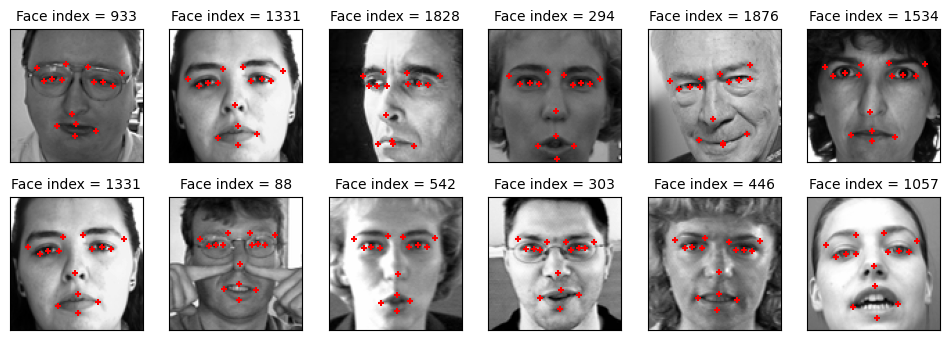

In [13]:
n = 0
nrows = 2
ncols = 6
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
rand=np.random.choice(Val_Drop.shape[0],nrows*ncols)

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].set_title('Face index = %d' %(rand[n]),fontsize=10)          
        ax[row,col].imshow(Img_Drop[rand[n]], cmap='gray') 
        ax[row,col].scatter(Val_Drop[rand[n],0::2]*Spic,Val_Drop[rand[n],1::2]*Spic,marker='+',c='red',s=15)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1

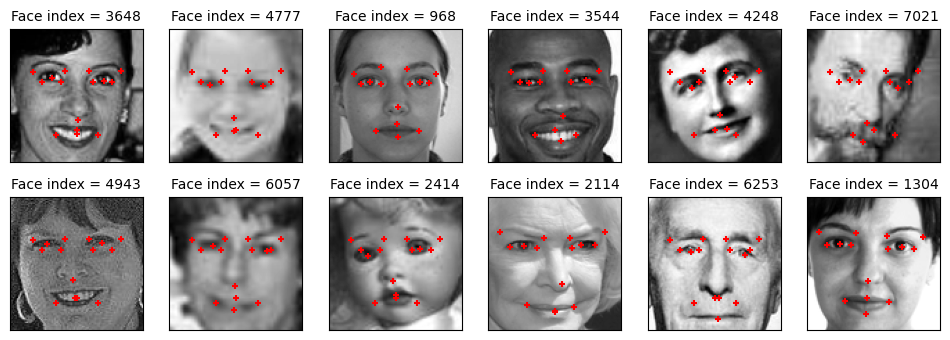

In [14]:
n = 0
nrows = 2
ncols = 6
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
rand=np.random.choice(Val_Med.shape[0],nrows*ncols)

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].set_title('Face index = %d' %(rand[n]),fontsize=10)          
        ax[row,col].imshow(Img_Med[rand[n]], cmap='gray') 
        ax[row,col].scatter(Val_Med[rand[n],0::2]*Spic,Val_Med[rand[n],1::2]*Spic,marker='+',c='red',s=15)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1

Method by CNN 

split original data to Test 20% and train 80% (this is common when we use supervised learning)

In [15]:
# To Split the dataset

randomSeed =21
Img_Med_train, Img_Med_test, Val_Med_train, Val_Med_test = train_test_split(Img_Med, Val_Med, test_size=0.2, random_state=randomSeed)
Img_Drop_train, Img_Drop_test, Val_Drop_train, Val_Drop_test = train_test_split(Img_Drop, Val_Drop, test_size=0.2, random_state=randomSeed)

2.1.1 CNN standard to solve problem (Median)

In [16]:
model_Med = Sequential()

model_Med.add(Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(96,96,1)))
model_Med.add(MaxPool2D(pool_size=(2, 2)))
model_Med.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model_Med.add(MaxPool2D(pool_size=(2, 2)))
model_Med.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model_Med.add(MaxPool2D(pool_size=(2, 2)))
model_Med.add(Dropout(0.5))
model_Med.add(Flatten())
model_Med.add(Dense(100, activation='relu'))
model_Med.add(Dense(30, activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate=0.001)

# compare x test and x train
model_Med.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error','acc'])

history_Med = model_Med.fit(Img_Med_train, 
          Val_Med_train, 
          batch_size=62, 
          epochs=5, 
          validation_data = (Img_Med_test, Val_Med_test), 
          verbose = 1)


Epoch 1/5
91/91 [==============================] - 40s 417ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - acc: 0.4765 - val_loss: 8.2865e-04 - val_mean_squared_error: 8.2865e-04 - val_acc: 0.5801
Epoch 2/5
91/91 [==============================] - 41s 451ms/step - loss: 7.8904e-04 - mean_squared_error: 7.8904e-04 - acc: 0.5934 - val_loss: 7.1119e-04 - val_mean_squared_error: 7.1119e-04 - val_acc: 0.6411
Epoch 3/5
91/91 [==============================] - 41s 449ms/step - loss: 6.9239e-04 - mean_squared_error: 6.9239e-04 - acc: 0.6648 - val_loss: 6.5406e-04 - val_mean_squared_error: 6.5406e-04 - val_acc: 0.6766
Epoch 4/5
91/91 [==============================] - 40s 441ms/step - loss: 6.3626e-04 - mean_squared_error: 6.3626e-04 - acc: 0.6969 - val_loss: 6.1248e-04 - val_mean_squared_error: 6.1248e-04 - val_acc: 0.7248
Epoch 5/5
91/91 [==============================] - 41s 445ms/step - loss: 5.9412e-04 - mean_squared_error: 5.9412e-04 - acc: 0.7271 - val_loss: 5.9052e-04 - val_mean_sq

In [17]:
model_Med.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

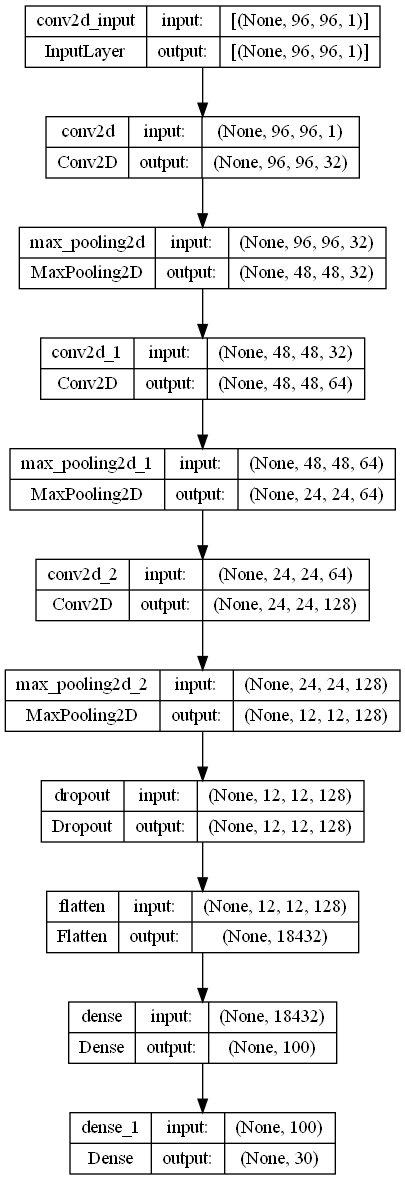

In [18]:
# Assuming 'model_Med' is your Keras model
plot_model(model_Med, to_file='model.png', show_shapes=True, show_layer_names=True)

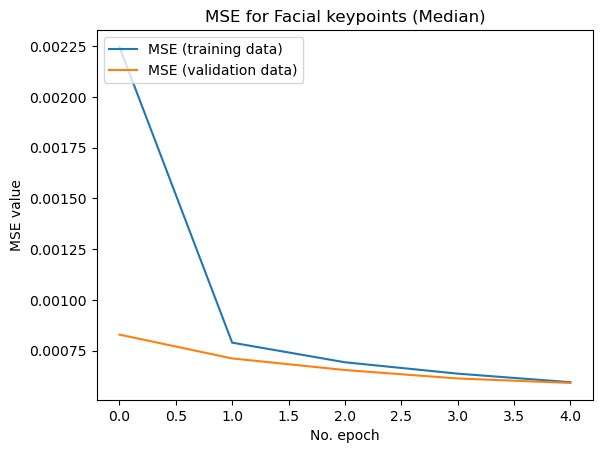

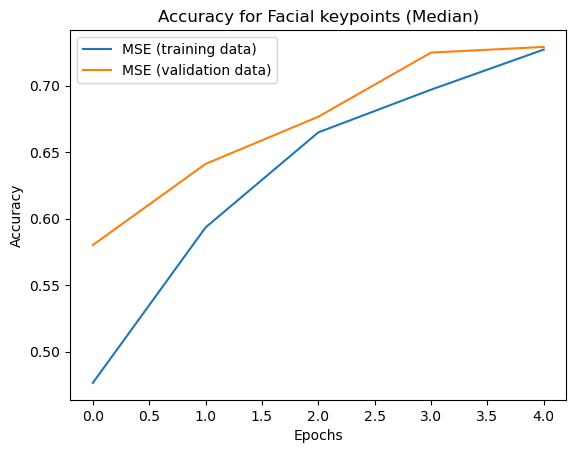

In [19]:
# The result for Loss
plt.plot(history_Med.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history_Med.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints (Median)')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# The result of accuracy 
plt.plot(history_Med.history['acc'], label='MSE (training data)') 
plt.plot(history_Med.history['val_acc'], label='MSE (validation data)')
plt.title('Accuracy for Facial keypoints (Median)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.show()

2.1.2 CNN standard to solve problem (Drop)

In [20]:
model_Drop = Sequential()

model_Drop.add(Conv2D(32, (3, 3), padding = 'same', activation='relu',input_shape=(96,96,1)))
model_Drop.add(MaxPool2D(pool_size=(2, 2)))
model_Drop.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model_Drop.add(MaxPool2D(pool_size=(2, 2)))
model_Drop.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model_Drop.add(MaxPool2D(pool_size=(2, 2)))
model_Drop.add(Dropout(0.5))
model_Drop.add(Flatten())
model_Drop.add(Dense(100, activation='relu'))
model_Drop.add(Dense(30, activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate=0.001)

# compare x test and x train
model_Drop.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error','acc'])

history_Drop = model_Drop.fit(Img_Drop_train, 
         Val_Drop_train, 
         batch_size=32, 
         epochs=5, 
         validation_data = (Img_Drop_test, Val_Drop_test), 
        verbose = 1)


Epoch 1/5
54/54 [==============================] - 13s 235ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - acc: 0.5637 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_acc: 0.6893
Epoch 2/5
54/54 [==============================] - 13s 234ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - acc: 0.7091 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_acc: 0.6893
Epoch 3/5
54/54 [==============================] - 13s 232ms/step - loss: 9.4101e-04 - mean_squared_error: 9.4101e-04 - acc: 0.7068 - val_loss: 9.1614e-04 - val_mean_squared_error: 9.1614e-04 - val_acc: 0.6963
Epoch 4/5
54/54 [==============================] - 13s 232ms/step - loss: 7.1300e-04 - mean_squared_error: 7.1300e-04 - acc: 0.7220 - val_loss: 6.3797e-04 - val_mean_squared_error: 6.3797e-04 - val_acc: 0.7033
Epoch 5/5
54/54 [==============================] - 14s 254ms/step - loss: 5.6774e-04 - mean_squared_error: 5.6774e-04 - acc: 0.7220 - val_loss: 5.2247e-04 - val_mean_squared_error: 5.2247e-04 

In [21]:
model_Drop.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 128)     

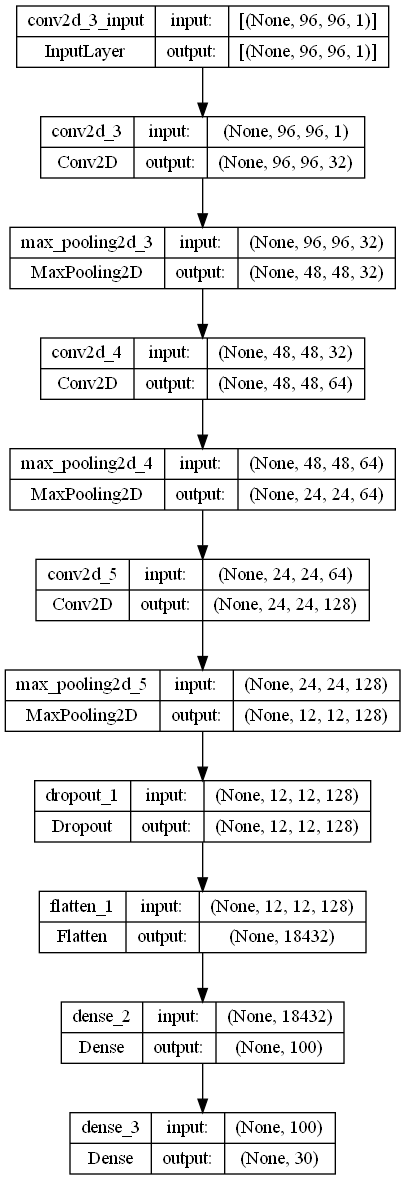

In [22]:
# Assuming 'model_Med' is your Keras model
plot_model(model_Drop, to_file='model.png', show_shapes=True, show_layer_names=True)

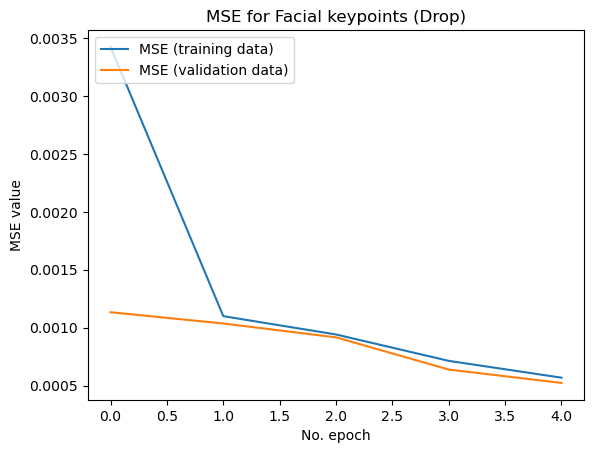

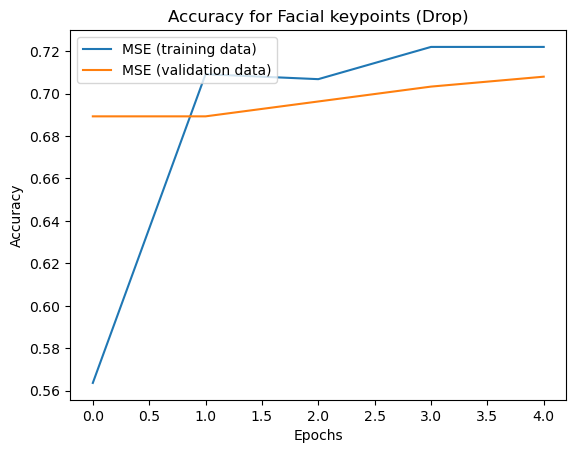

In [23]:
# The result for Loss
plt.plot(history_Drop.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history_Drop.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints (Drop)')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# The result of accuracy 
plt.plot(history_Drop.history['acc'], label='MSE (training data)') 
plt.plot(history_Drop.history['val_acc'], label='MSE (validation data)')
plt.title('Accuracy for Facial keypoints (Drop)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.show()

2.2 ResNet to slove problem

In [24]:
# Input layer
input_layer = Input(shape=(96, 96, 1))

# Initial Convolution Layer
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)

# Define a residual block function
def residual_block(x, filters, kernel_size=3):
    # Shortcut
    shortcut = x
    # First convolution layer
    x = Conv2D(filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
    # Second convolution layer
    x = Conv2D(filters, (kernel_size, kernel_size), activation='relu', padding='same')(x) 
    # Add the shortcut to the output
    x = Add()([x, shortcut])
    
    return x

# Add residual blocks
for _ in range(3):  # You can adjust the number of residual blocks
    x = residual_block(x, 64)

# Max-Pooling Layer
x = MaxPool2D(pool_size=(2, 2))(x)

# Flatten Layer
x = Flatten()(x)

# Fully Connected Layers
x = Dense(100, activation='relu')(x)
output_layer = Dense(30, activation='sigmoid')(x)

# Create the ResNet model
model_ResNet = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
adam = keras.optimizers.Adam(learning_rate=0.001)
model_ResNet.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error', 'acc'])

history_ResNet = model_ResNet.fit(Img_Drop_train, 
         Val_Drop_train, 
         batch_size=32, 
         epochs=5, 
         validation_data = (Img_Drop_test, Val_Drop_test), 
        verbose = 1)


Epoch 1/5
54/54 [==============================] - 214s 4s/step - loss: 0.0397 - mean_squared_error: 0.0397 - acc: 0.2646 - val_loss: 0.0022 - val_mean_squared_error: 0.0022 - val_acc: 0.6893
Epoch 2/5
54/54 [==============================] - 202s 4s/step - loss: 0.0013 - mean_squared_error: 0.0013 - acc: 0.6916 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_acc: 0.6893
Epoch 3/5
54/54 [==============================] - 188s 3s/step - loss: 0.0010 - mean_squared_error: 0.0010 - acc: 0.7091 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_acc: 0.6893
Epoch 4/5
54/54 [==============================] - 183s 3s/step - loss: 9.7213e-04 - mean_squared_error: 9.7213e-04 - acc: 0.7091 - val_loss: 9.6763e-04 - val_mean_squared_error: 9.6763e-04 - val_acc: 0.6893
Epoch 5/5
54/54 [==============================] - 182s 3s/step - loss: 8.9337e-04 - mean_squared_error: 8.9337e-04 - acc: 0.7091 - val_loss: 8.7722e-04 - val_mean_squared_error: 8.7722e-04 - val_acc: 0.6893


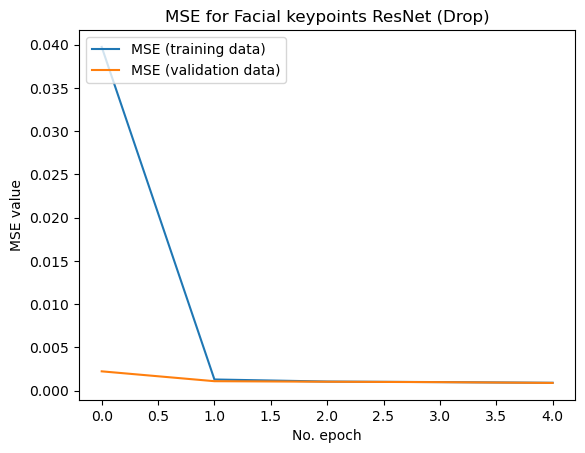

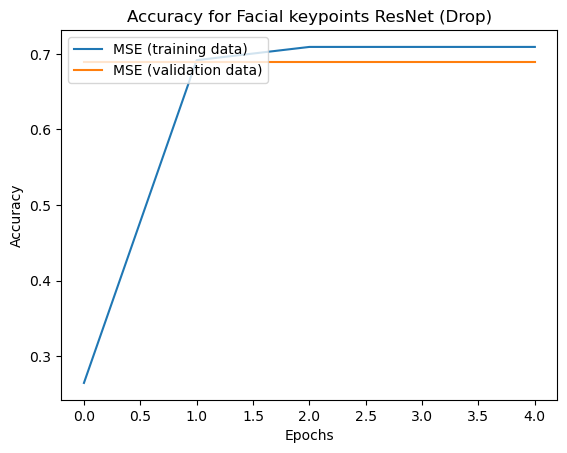

In [25]:
# The result for Loss
plt.plot(history_ResNet.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history_ResNet.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints ResNet (Drop)')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# The result of accuracy 
plt.plot(history_ResNet.history['acc'], label='MSE (training data)') 
plt.plot(history_ResNet.history['val_acc'], label='MSE (validation data)')
plt.title('Accuracy for Facial keypoints ResNet (Drop)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.show()

In [26]:
model_ResNet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 96, 96, 64)   640         ['input_1[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 96, 96, 64)   36928       ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 96, 96, 64)   36928       ['conv2d_7[0][0]']               
                                                                                              

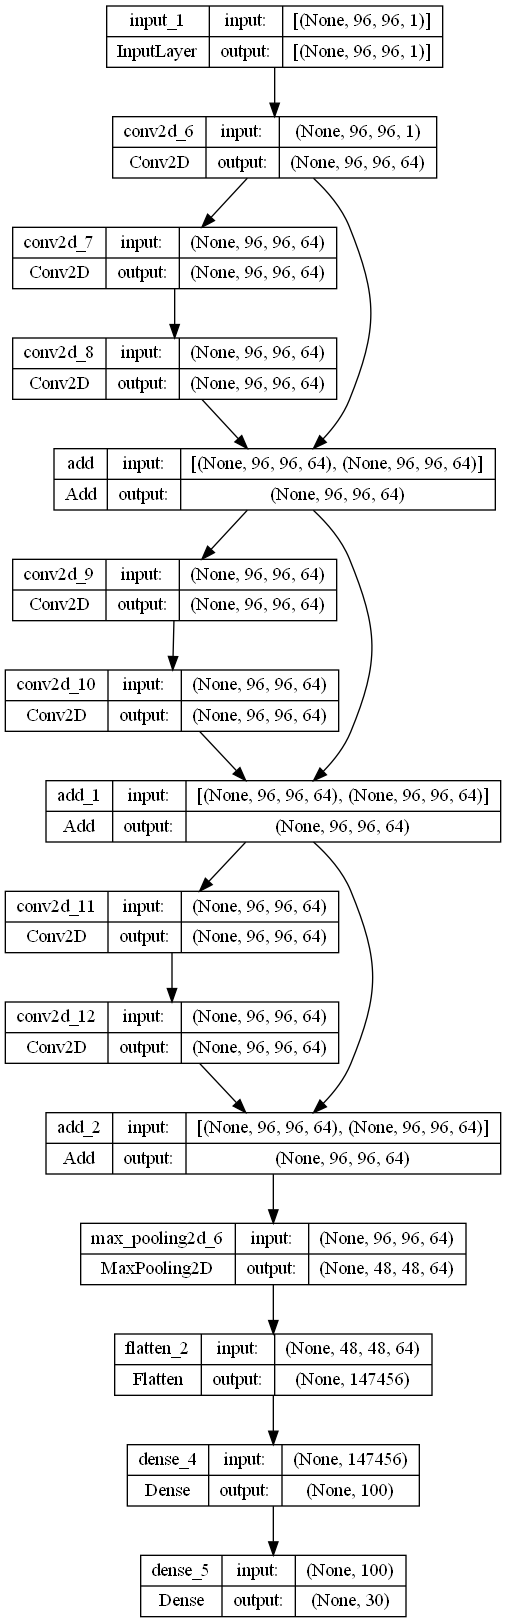

In [27]:
# Assuming 'model_ResNet' is your Keras model
plot_model(model_ResNet, to_file='model.png', show_shapes=True, show_layer_names=True)

2.3 VGGNet to solve problem

In [28]:
model_VGGNet = Sequential()

model_VGGNet.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(96,96,1)))
model_VGGNet.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model_VGGNet.add(MaxPool2D(pool_size=(2, 2)))
model_VGGNet.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(MaxPool2D(pool_size=(2, 2)))
model_VGGNet.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(MaxPool2D(pool_size=(2, 2)))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(MaxPool2D(pool_size=(2, 2)))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(Conv2D(512, (3, 3), activation='relu', padding="same"))
model_VGGNet.add(MaxPool2D(pool_size=(2, 2)))
model_VGGNet.add(Flatten())
model_VGGNet.add(Dense(4096, activation='relu'))
model_VGGNet.add(Dense(4096, activation='relu'))
model_VGGNet.add(Dense(30, activation='softmax'))

adam = keras.optimizers.Adam(learning_rate=0.001)

model_VGGNet.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error','acc'])

history_VGG = model_VGGNet.fit(Img_Drop_train, 
          Val_Drop_train, 
          batch_size=128, 
          epochs=5, 
          validation_data = (Img_Drop_test, Val_Drop_test), 
          verbose = 1)

Epoch 1/5
14/14 [==============================] - 224s 16s/step - loss: 0.2577 - mean_squared_error: 0.2577 - acc: 0.5152 - val_loss: 0.2600 - val_mean_squared_error: 0.2600 - val_acc: 0.6893
Epoch 2/5
14/14 [==============================] - 222s 16s/step - loss: 0.2601 - mean_squared_error: 0.2601 - acc: 0.7091 - val_loss: 0.2600 - val_mean_squared_error: 0.2600 - val_acc: 0.6893
Epoch 3/5
14/14 [==============================] - 221s 16s/step - loss: 0.2601 - mean_squared_error: 0.2601 - acc: 0.7091 - val_loss: 0.2600 - val_mean_squared_error: 0.2600 - val_acc: 0.6893
Epoch 4/5
14/14 [==============================] - 232s 17s/step - loss: 0.2601 - mean_squared_error: 0.2601 - acc: 0.7091 - val_loss: 0.2600 - val_mean_squared_error: 0.2600 - val_acc: 0.6893
Epoch 5/5
14/14 [==============================] - 223s 16s/step - loss: 0.2601 - mean_squared_error: 0.2601 - acc: 0.7091 - val_loss: 0.2600 - val_mean_squared_error: 0.2600 - val_acc: 0.6893


In [29]:
model_VGGNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 96, 96, 64)        640       
                                                                 
 conv2d_14 (Conv2D)          (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 48, 48, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 48, 48, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                  

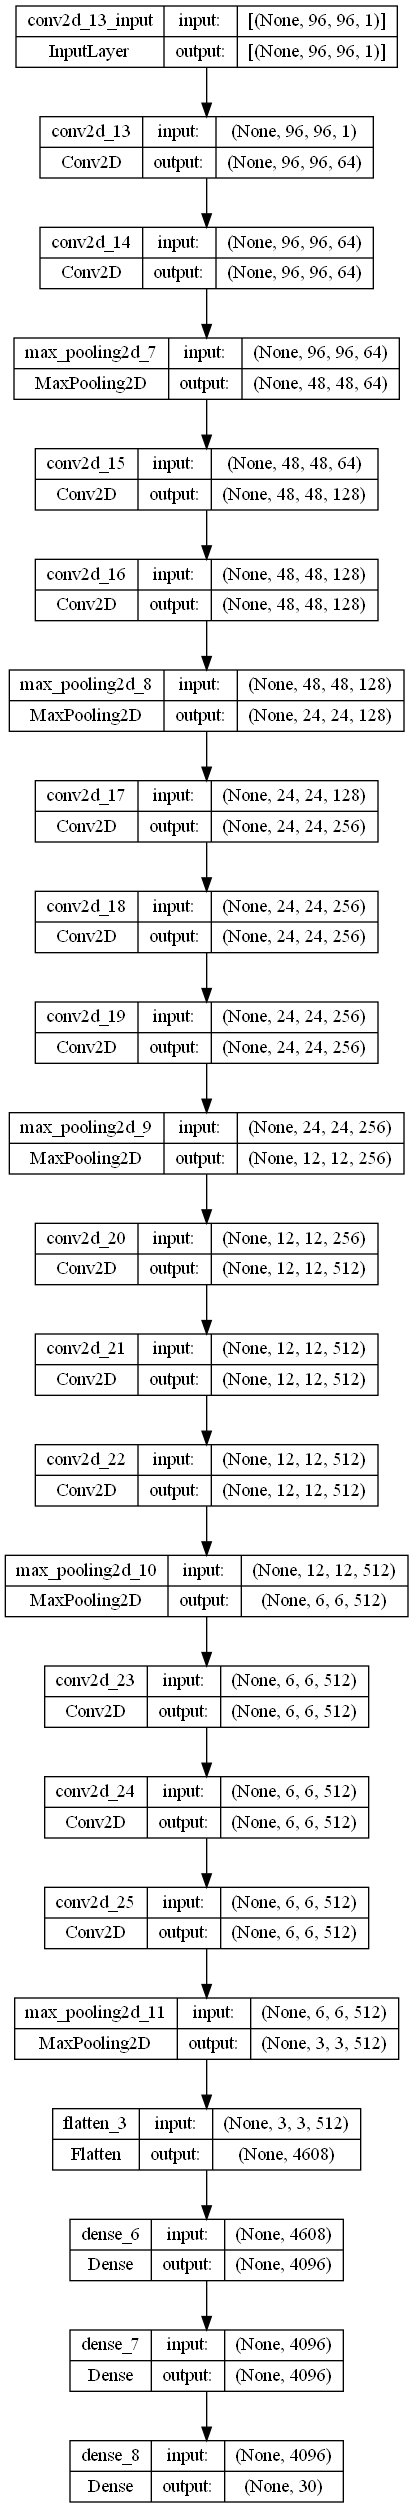

In [30]:
# Assuming 'model_VGGNet' is your Keras model
plot_model(model_VGGNet, to_file='model.png', show_shapes=True, show_layer_names=True)

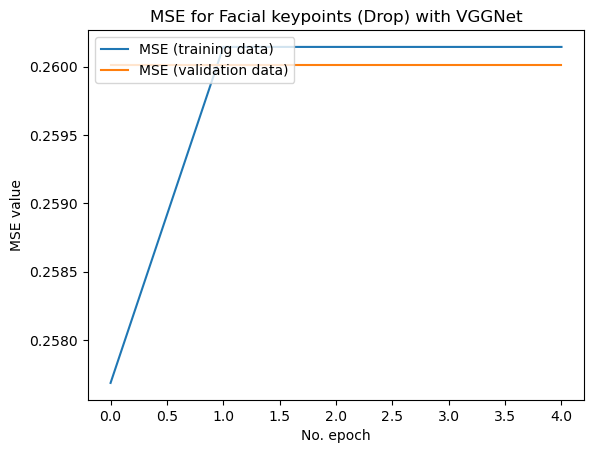

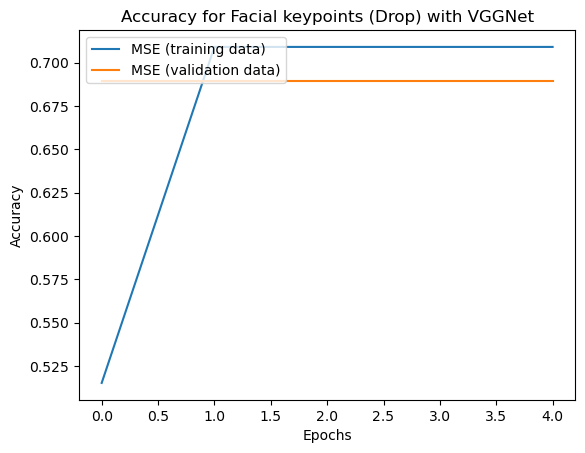

In [31]:
# The result for Loss
plt.plot(history_VGG.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history_VGG.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints (Drop) with VGGNet')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# The result of accuracy 
plt.plot(history_VGG.history['acc'], label='MSE (training data)') 
plt.plot(history_VGG.history['val_acc'], label='MSE (validation data)')
plt.title('Accuracy for Facial keypoints (Drop) with VGGNet')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.show()

3.Ploting training data to images 

45/45 [==============================] - 3s 59ms/step


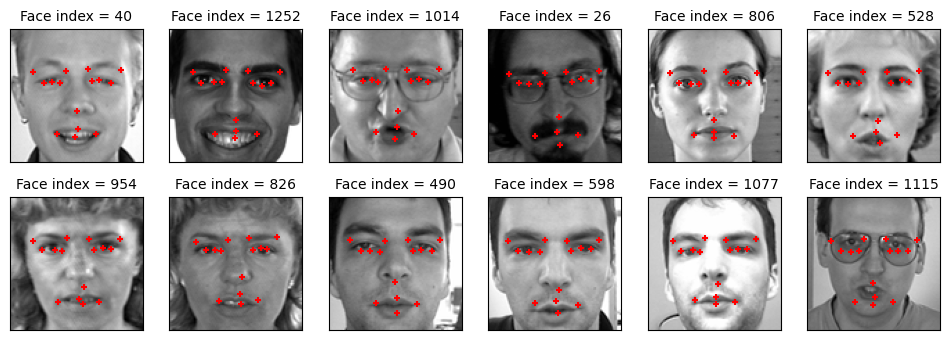

In [32]:
Val_Med_train_Pred = model_Med.predict(Img_Med_train)
Val_Med_test_Pred = model_Med.predict(Img_Med_test)

n = 0
nrows = 2
ncols = 6
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
rand=np.random.choice(Val_Med_test.shape[0],nrows*ncols)

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].set_title('Face index = %d' %(rand[n]),fontsize=10)
        ax[row,col].imshow(Img_Med[rand[n]], cmap='gray')
        ax[row,col].scatter(Val_Med_test_Pred[rand[n],0::2]*Spic,Val_Med_test_Pred[rand[n],1::2]*Spic,marker='+',c='red',s=15)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1

14/14 [==============================] - 1s 54ms/step


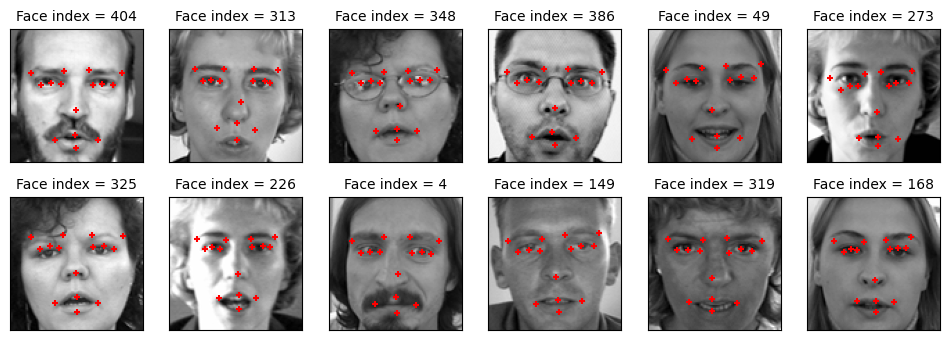

In [33]:
Val_Drop_train_Pred = model_Drop.predict(Img_Drop_train)
Val_Drop_test_Pred = model_Drop.predict(Img_Drop_test)

n = 0
nrows = 2
ncols = 6
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
rand=np.random.choice(Val_Drop_test.shape[0],nrows*ncols)

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].set_title('Face index = %d' %(rand[n]),fontsize=10)
        ax[row,col].imshow(Img_Drop[rand[n]], cmap='gray')
        ax[row,col].scatter(Val_Drop_test_Pred[rand[n],0::2]*Spic,Val_Drop_test_Pred[rand[n],1::2]*Spic,marker='+',c='red',s=15)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1

45/45 [==============================] - 38s 838ms/step


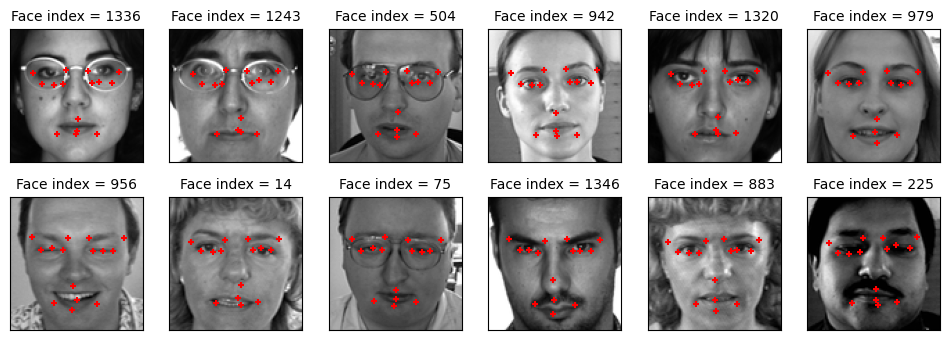

In [34]:
Val_ResNet_train_Pred = model_ResNet.predict(Img_Med_train)
Val_ResNet_test_Pred = model_ResNet.predict(Img_Med_test)

n = 0
nrows = 2
ncols = 6
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
rand=np.random.choice(Val_Med_test.shape[0],nrows*ncols)

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].set_title('Face index = %d' %(rand[n]),fontsize=10)
        ax[row,col].imshow(Img_Med[rand[n]], cmap='gray')
        ax[row,col].scatter(Val_Med_test_Pred[rand[n],0::2]*Spic,Val_Med_test_Pred[rand[n],1::2]*Spic,marker='+',c='red',s=15)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1

45/45 [==============================] - 44s 980ms/step


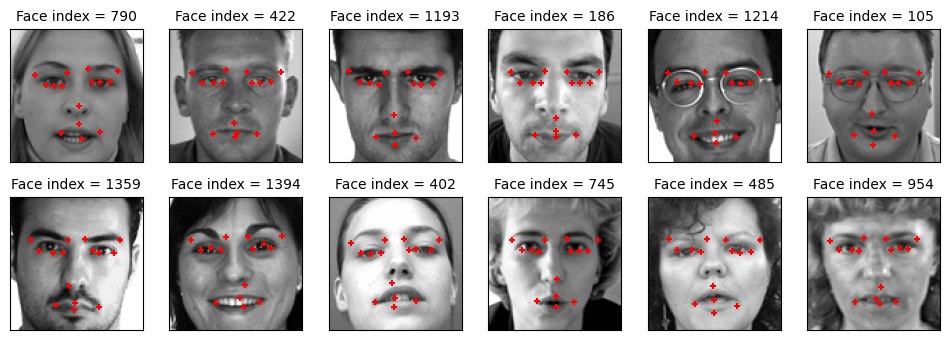

In [35]:
Val_ResNet_train_Pred = model_VGGNet.predict(Img_Med_train)
Val_ResNet_test_Pred = model_VGGNet.predict(Img_Med_test)

n = 0
nrows = 2
ncols = 6
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
rand=np.random.choice(Val_Med_test.shape[0],nrows*ncols)

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].set_title('Face index = %d' %(rand[n]),fontsize=10)
        ax[row,col].imshow(Img_Med[rand[n]], cmap='gray')
        ax[row,col].scatter(Val_Med_test_Pred[rand[n],0::2]*Spic,Val_Med_test_Pred[rand[n],1::2]*Spic,marker='+',c='red',s=15)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        n += 1